In [81]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
multiprocessing.set_start_method("fork", force=True)

from orbit.utils.stan import get_compiled_stan_model_simplified, compile_stan_model_simplified

In [82]:
stan_model_path = "./stan/ss_local_level.stan"
compiled_path = compile_stan_model_simplified("./stan/ss_local_level.stan")
stan_mod = get_compiled_stan_model_simplified(compiled_path)

In [83]:
x = np.random.normal(0, 0.2, 100)
y = np.cumsum(x) + np.random.normal(0, 1.0, 100)

In [84]:
y = (y - np.mean(y))/np.std(y)

In [101]:
data = {
    'N' : len(y),
    'Y' : y,
    'SD_Y' : 1.0,
    'A1' : 0.0,
    'P1' : 1.0,
    'state_sigma_mean': 0.1,
    'state_sigma_sd': 1.0,
    'obs_sigma_mean': 0.5,
    'obs_sigma_sd': 1.0,
}

In [102]:
fit = stan_mod.sampling(
    data=data,
    warmup=500,
    iter=1000,
    chains=4,
)


Gradient evaluation took 0.000103 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.03 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 5.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 4.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)

Gradient evaluation took 4.5e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warm

/Users/towinazure/opt/miniconda3/envs/ts/lib/python3.8/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/towinazure/opt/miniconda3/envs/ts/lib/python3.8/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


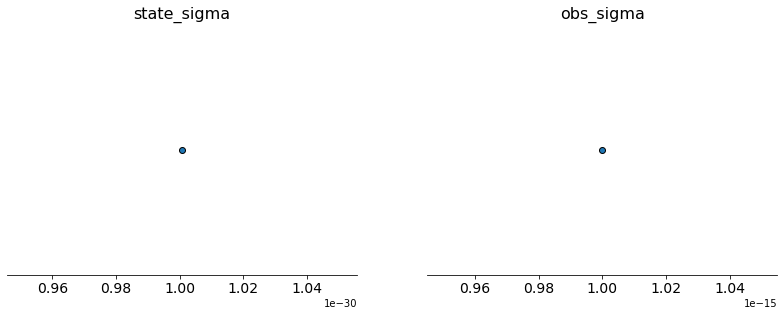

In [111]:
az.plot_density(fit, var_names=['state_sigma', 'obs_sigma']);

In [107]:
posteriors = fit.extract(pars=['state_sigma', 'obs_sigma'], permuted=False)

In [108]:
posteriors['state_sigma']

array([[1.00000000e-30, 2.66453526e-30, 1.00000000e-30, 1.00000000e-30],
       [1.00000000e-30, 1.00000000e-30, 1.00000000e-30, 1.00000000e-30],
       [1.00000000e-30, 1.00000000e-30, 1.00000000e-30, 1.00000000e-30],
       ...,
       [1.00000000e-30, 1.00000000e-30, 1.00000000e-30, 1.00000000e-30],
       [1.00000000e-30, 1.00000000e-30, 1.00000000e-30, 1.00000000e-30],
       [1.00000000e-30, 1.00000000e-30, 1.00000000e-30, 1.00000000e-30]])

In [109]:
# for key, val in posteriors.items():
#     posteriors[key] = val.transpose(1, 0)

/Users/towinazure/opt/miniconda3/envs/ts/lib/python3.8/site-packages/arviz/data/base.py:220: UserWarning: More chains (500) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
/Users/towinazure/opt/miniconda3/envs/ts/lib/python3.8/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/towinazure/opt/miniconda3/envs/ts/lib/python3.8/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/towinazure/opt/miniconda3/envs/ts/lib/python3.8/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/towinazure

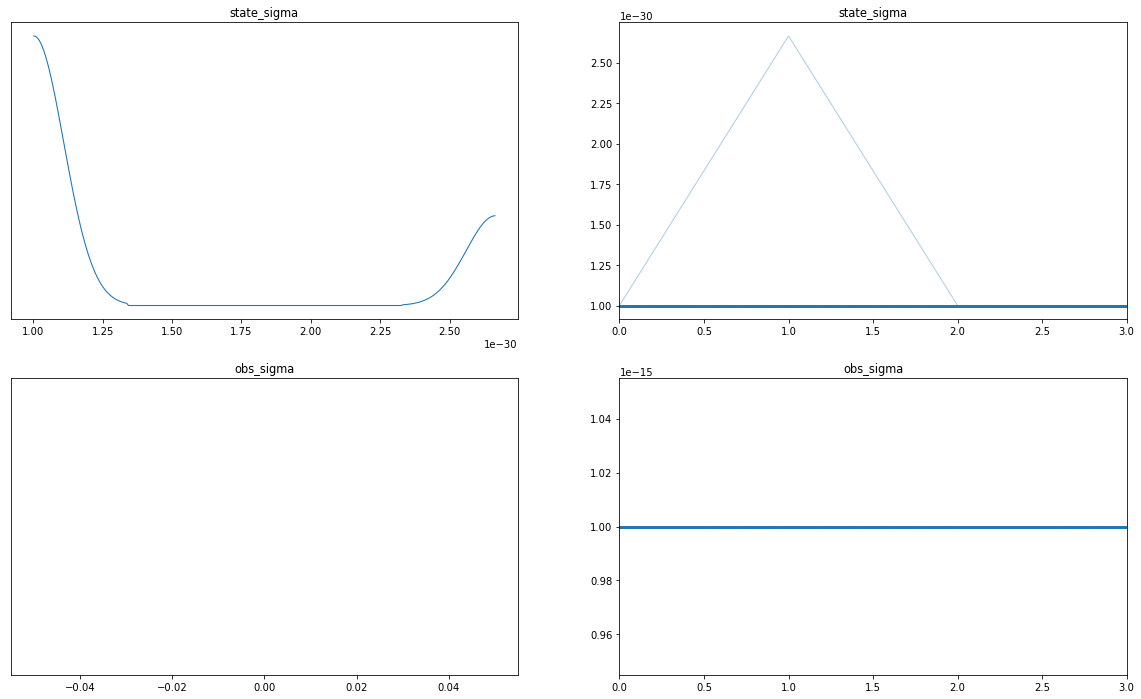

In [110]:
# diagnostic
import arviz as az

az.plot_trace(posteriors, figsize=(20, 12));

In [103]:
posteriors = results.extract(pars=['a'], permuted=True)
states_mean = posteriors['a']
states_mean = np.mean(states_mean, 0)

In [104]:
states_mean.shape

(101,)

In [105]:
y.shape

(100,)

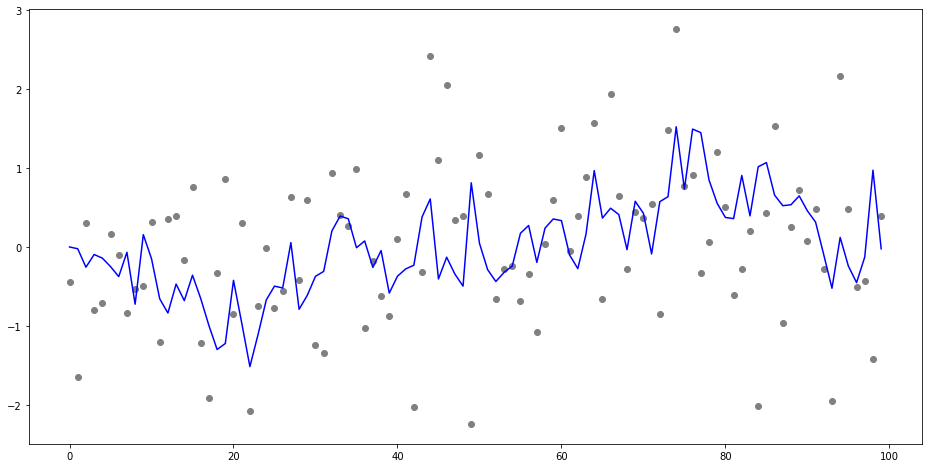

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
x = np.arange(0, len(y))
ax.scatter(x, y, c='grey')
ax.plot(x, states_mean[:-1], color='blue');